### Inspection of correlation coefficients of density estimates from pairwise comparison of vectorizers

In [1]:
import scipy
import pandas as pd
import plotnine as pn
import numpy as np

import matplotlib.pyplot as plt
import warnings
import matplotlib.gridspec as gridspec


from tqdm import tqdm



In [2]:
df_all = pd.read_csv("../../analysis_data/all_data.csv")
df_all

,density,edginess,references,citations_per_year,is_center,identifier,year,librarian,vectorizer,center,fields_of_study_0
0,1545.550332,0.814415,42,2.250000,False,2e5f3e6c87d1676cdeffc3a2bfbc30b6cd06ed6f,2004,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics
1,1846.261870,0.452021,88,4.625000,False,d7b6cd39dd111afa55a3aa418b7b5459db12988d,2012,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics
2,1703.520959,0.490212,30,0.882353,False,2d62ec65f95435c72ef750b3cff331382c5dca92,2003,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics
3,1901.386693,0.715160,95,8.166667,False,8cebc6e3dcfb543bad48d89112e281a6e11c33c2,2014,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics
4,535.472125,0.885892,94,2.090909,False,59730a4bae4dc53f59341b63fd1e63451c589e9f,2009,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics
...,...,...,...,...,...,...,...,...,...,...,...
537685,48.730838,0.658585,41,3.500000,False,806f77ba7bdf8a3b80cb859fb5f33f57c1d85d24,2018,S2,SciBERT,Andre2018,Mathematics
537686,25.107589,0.721374,38,3.200000,False,f40707d1165c22e185c25e6837977177ee380f2c,2015,S2,SciBERT,Andre2018,Mathematics
537687,41.647954,0.646499,11,1.529412,False,10636ee16779a7521001651164acb5c192d4ad7b,2003,S2,SciBERT,Andre2018,Mathematics
537688,35.738649,0.708053,15,2.384615,False,a229f829e0a5362d00e63781f687f40ede991635,2007,S2,SciBERT,Andre2018,Mathematics


In [8]:
vectorizers = sorted(df_all.vectorizer.unique())
vectorizers

['BOW', 'GPT2', 'SBERT', 'SciBERT', 'Word2Vec']

In [9]:
fields = sorted(df_all.fields_of_study_0.unique())
fields

['Economics',
 'Education',
 'Geology',
 'Linguistics',
 'Materials Science',
 'Mathematics',
 'Medicine',
 'Philosophy',
 'Physics']

In [11]:
correlations = np.full((len(vectorizers), len(vectorizers)), np.nan)

First practice on just one field

In [40]:
from scipy.stats import pearsonr

for field in fields:
    print(f"--------------------------{field}------------------------------------")
    df_field = df_all[df_all.fields_of_study_0 == field]
    for i in range(len(vectorizers)):
        for j in range(i+1, len(vectorizers)):
            vec_i = vectorizers[i]
            vec_j = vectorizers[j]

            df_field_vec_i = df_field[df_field.vectorizer == vec_i]
            df_field_vec_j = df_field[df_field.vectorizer == vec_j]

            df_merged = pd.merge(df_field_vec_i, df_field_vec_j, on = "identifier", suffixes=["_i", "_j"])
            # print(f"{vec_i} vs. {vec_j}", "; Number of overlapping identifiers:", df_merged.shape[0])
            vec_i_densities = df_merged["density_i"].values
            vec_j_densities = df_merged["density_j"].values
            
            result = pearsonr(vec_i_densities, vec_j_densities)
            # correlations[i,j] = correlation
            print(f"Correlation between {vec_i} and {vec_j}: {result.correlation:.2f}") # all p-values were sig

            # can we get the intercept too?
            

--------------------------Economics------------------------------------
Correlation between BOW and GPT2: -0.12
Correlation between BOW and SBERT: 0.22
Correlation between BOW and SciBERT: -0.02
Correlation between BOW and Word2Vec: 0.54
Correlation between GPT2 and SBERT: 0.10
Correlation between GPT2 and SciBERT: 0.38
Correlation between GPT2 and Word2Vec: -0.04
Correlation between SBERT and SciBERT: 0.35
Correlation between SBERT and Word2Vec: 0.38
Correlation between SciBERT and Word2Vec: 0.16
--------------------------Education------------------------------------
Correlation between BOW and GPT2: -0.07
Correlation between BOW and SBERT: 0.29
Correlation between BOW and SciBERT: 0.10
Correlation between BOW and Word2Vec: 0.61
Correlation between GPT2 and SBERT: 0.01
Correlation between GPT2 and SciBERT: 0.24
Correlation between GPT2 and Word2Vec: 0.09
Correlation between SBERT and SciBERT: 0.51
Correlation between SBERT and Word2Vec: 0.36
Correlation between SciBERT and Word2Vec: 0

So this isn't exactly Zach's point. Zach's point was that the correlation direction for BOW and Word2Vec switches directions across fields, whereas it stays the same for transformer embeddings.

In [ ]:
# Try just faceting our analysis data

In [41]:
df_an = pd.read_csv("../../analysis_data/transformed_all_data.csv")

,log_cpy_var,cpy_med,ref_med,year_med,density_bin,density_bin_z,cpy_med_z,ref_med_z,year_med_z,field,vectorizer
0,0.331658,4.000000,72.0,2010.0,19.726,-2.786181,-1.999242,0.581697,-1.042169,Physics,GPT2
1,0.246754,5.000000,82.0,2013.0,168.476,-2.514635,-1.115459,1.567625,0.625302,Physics,GPT2
2,0.293499,8.100000,79.5,2012.0,273.329,-2.323225,1.624270,1.321143,0.069478,Physics,GPT2
3,0.213240,5.705882,64.0,2011.0,358.318,-2.168076,-0.491612,-0.207045,-0.486346,Physics,GPT2
4,0.235837,8.000000,76.0,2011.0,422.550,-2.050819,1.535892,0.976068,-0.486346,Physics,GPT2
...,...,...,...,...,...,...,...,...,...,...,...
4495,0.366704,1.400000,23.0,2012.0,48.272,1.463766,0.865460,-0.988509,1.074936,Mathematics,SciBERT
4496,0.274933,1.625000,25.5,2013.0,48.803,1.540596,1.595976,0.205342,1.918022,Mathematics,SciBERT
4497,0.286359,1.333333,26.0,2014.0,49.584,1.653599,0.649011,0.444113,2.761109,Mathematics,SciBERT
4498,0.316263,1.571429,28.0,2014.0,50.476,1.782662,1.422044,1.399194,2.761109,Mathematics,SciBERT


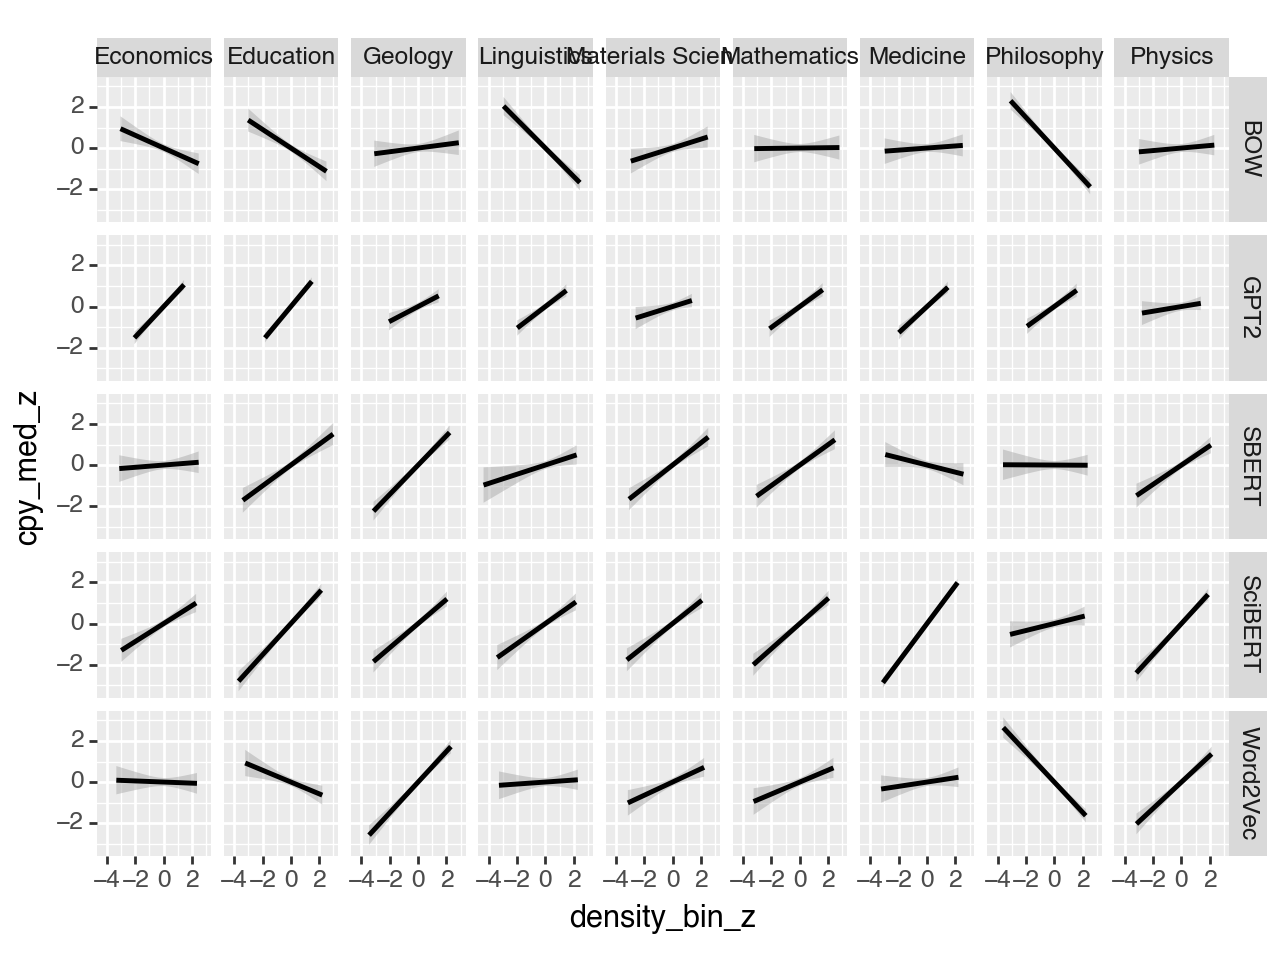

<Figure Size: (640 x 480)>

In [59]:
(
    pn.ggplot(
        df_an,
        pn.aes(
            x="density_bin_z",
            y="cpy_med_z",
        )
    )
    # + pn.geom_point(
    #     alpha=0.1,
    # )    
    # + pn.geom_smooth(
    #     pn.aes(
    #         color="field",
    #     )
    # )
    + pn.facet_grid("vectorizer ~ field")
    # + pn.ylim(0,10)
    + pn.geom_smooth()
)